# Chapter 3 
 Industrial Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (2023) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/mistat-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

# Advanced Methods of Statistical Process Control

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import mistat
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## Tests of Randomness

### Testing the Number of Runs

### Runs Above and Below a Specified Level

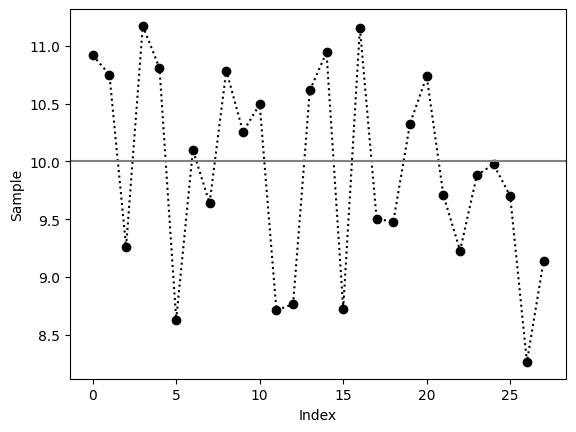

In [3]:
rnorm10 = mistat.load_data('RNORM10')
ax = rnorm10.plot(marker='o', linestyle=':', color='black')
ax.axhline(10, color='grey')
ax.set_ylabel('Sample')
ax.set_xlabel('Index')
plt.show()

In [4]:
rnorm10 = mistat.load_data('RNORM10')

x = [0 if xi <= 10 else 1 for xi in rnorm10]
_ = mistat.runsTest(x, alternative='less', verbose=True)


Runs Test

Standard Normal = -0.3596, p-value = 0.3596
alternative hypothesis: less


### Runs Up and Down

### Testing the Length of Runs Up and Down

## Modified Shewhart Control Charts for $\bar X$

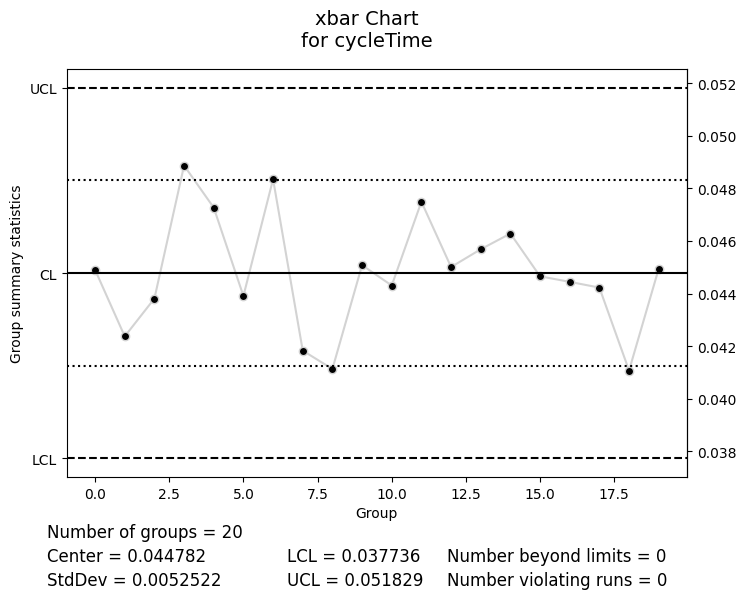

In [5]:
Ps = mistat.PistonSimulator(n_simulation=5 * 20, seed=1).simulate()
Ps = mistat.simulationGroup(Ps, 5)

cycleTime = mistat.qcc_groups(Ps['seconds'], Ps['group'])
qcc = mistat.QualityControlChart(cycleTime)

fig, ax = plt.subplots(figsize=(8, 6))
qcc.plot(title='for cycleTime', ax=ax)
st = qcc.std_dev / np.sqrt(qcc.sizes[0])
ax.axhline(qcc.center + 1.5 * st, linestyle=':', color='black')
ax.axhline(qcc.center - 1.5 * st, linestyle=':', color='black')
plt.show()

In [6]:
def ARL(a, w, r, delta, n, sigma=1):
    # standard deviation of means of n samples
    sigma_n = sigma / np.sqrt(n)
    # distribution of means from n samples; process shifted by delta*sigma
    distribution = stats.norm(scale=sigma_n, loc=delta*sigma)

    # calculate CDF at the +/-a*sigma_n and +/-w*sigma_n
    limits = [a*sigma_n, -a*sigma_n, w*sigma_n, -w*sigma_n]
    pa, ma, pw, mw = distribution.cdf(limits)

    # probability to be outside of control limits
    P = ma + (1-pa)
    
    # probability to be between warning and control limits
    H = pa - pw
    L = mw - ma
    
    # calculate ARL
    H_r = H**r
    L_r = L**r
    return 1 / (P + H_r*(1-H)/(1-H_r) + L_r*(1-L)/(1-L_r))

In [7]:
a = 3; n = 5; sigma = 1;
data = {}
for w in (1, 1.5, 2, 2.5):
    for delta in np.arange(0, 2.5, 0.25):
        data[(w, delta)] = {r: ARL(a, w, r, delta, n, sigma) 
                            for r in range(2, 8)}
df = pd.DataFrame.from_dict(data, orient='index').round(1)

In [8]:
df.round(1)

2      3      4      5      6      7
1.0 0.00   22.0  107.7  267.9  349.4  366.9  369.8
    0.25   11.2   32.1   67.1  101.3  120.9  129.0
    0.50    4.8    9.3   14.9   20.6   25.4   28.8
    0.75    2.8    4.4    5.8    7.1    8.1    8.9
    1.00    2.0    2.7    3.3    3.7    3.9    4.1
    1.25    1.6    2.0    2.2    2.3    2.3    2.4
    1.50    1.4    1.5    1.5    1.6    1.6    1.6
    1.75    1.2    1.2    1.2    1.2    1.2    1.2
    2.00    1.1    1.1    1.1    1.1    1.1    1.1
    2.25    1.0    1.0    1.0    1.0    1.0    1.0
1.5 0.00   93.1  310.2  365.7  370.1  370.4  370.4
    0.25   31.7   88.1  122.8  131.3  132.9  133.1
    0.50    9.3   18.8   26.8   31.0   32.6   33.1
    0.75    4.0    6.4    8.2    9.4   10.1   10.4
    1.00    2.4    3.2    3.7    4.1    4.3    4.4
    1.25    1.7    2.1    2.2    2.3    2.4    2.4
    1.50    1.4    1.5    1.5    1.6    1.6    1.6
    1.75    1.2    1.2    1.2    1.2    1.2    1.2
    2.00    1.1    1.1    1.1    1.1    1.1    1.1
    2.25    1.0    1.0    1.0    1.0    1.0    1.0
2.0 0.00  278.0  367.8  370.3  370.4  370.4  370.4
    0.25   84.7  128.3  132.8  133.1  133.2  133.2
    0.50   19.3   30.0   32.8   33.3   33.4   33.4
    0.75    6.5    9.2   10.3   10.6   10.7   10.7
    1.00    3.1    3.9    4.3    4.4    4.5    4.5
    1.25    1.9    2.2    2.3    2.4    2.4    2.4
    1.50    1.4    1.5    1.6    1.6    1.6    1.6
    1.75    1.2    1.2    1.2    1.2    1.2    1.2
    2.00    1.1    1.1    1.1    1.1    1.1    1.1
    2.25    1.0    1.0    1.0    1.0    1.0    1.0
2.5 0.00  364.1  370.4  370.4  370.4  370.4  370.4
    0.25  127.3  133.0  133.2  133.2  133.2  133.2
    0.50   30.6   33.2   33.4   33.4   33.4   33.4
    0.75    9.6   10.6   10.7   10.8   10.8   10.8
    1.00    4.0    4.4    4.5    4.5    4.5    4.5
    1.25    2.2    2.4    2.4    2.4    2.4    2.4
    1.50    1.5    1.6    1.6    1.6    1.6    1.6
    1.75    1.2    1.2    1.2    1.2    1.2    1.2
    2.00    1.1    1.1    1.1    1.1    1.1    1.1
    2.25    1.0    1.0    1.0    1.0    1.0    1.0

## The Size and Frequency of Sampling for Shewhart Control Charts

### The Economic Design for $\bar X$-charts

### Increasing The Sensitivity of $p$-charts

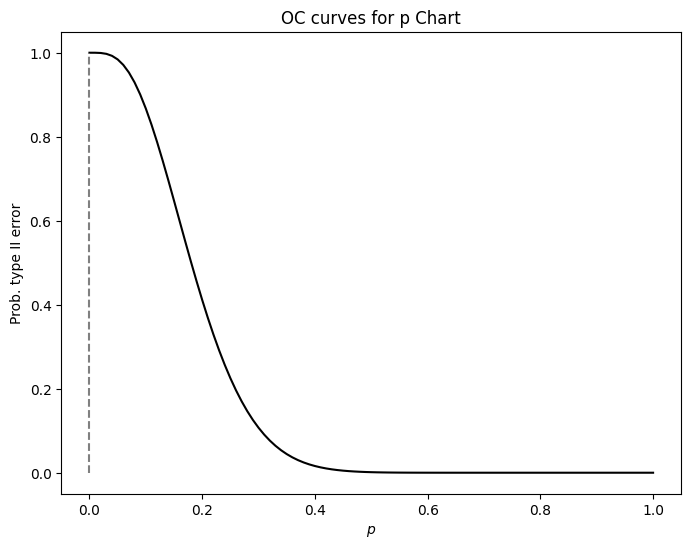

In [9]:
jandefect = mistat.load_data('JANDEFECT')
qcc = mistat.QualityControlChart(jandefect, qcc_type='p', sizes=20,
                                 center=0.048, std_dev=np.sqrt(0.048 * (1 - 0.048)))
qcc.oc_curves()

## Cumulative Sum Control Charts

### Upper Page's Scheme

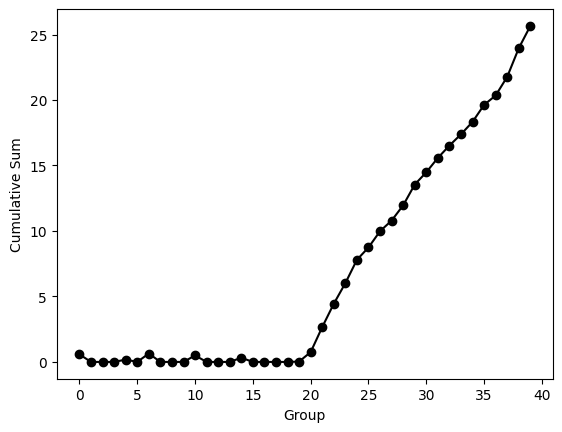

In [10]:
np.random.seed(1)
x = [*stats.norm(10).rvs(20), *stats.norm(13).rvs(20)]

analysis = mistat.Cusum(x, center=10)
ax = pd.Series(analysis.pos).plot(marker='o', color='black')
ax.set_xlabel('Group')
ax.set_ylabel('Cumulative Sum')
plt.show()

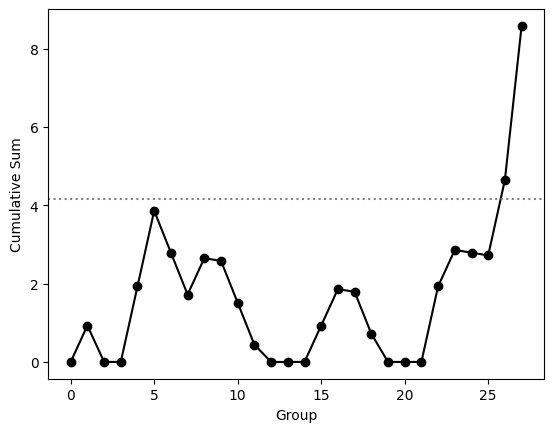

In [11]:
ipl = mistat.load_data('IPL')

analysis = mistat.Cusum(ipl, center=1.07, std_dev=1, se_shift=0, sizes=1, decision_interval=4.16)
ax = pd.Series(analysis.pos).plot(marker='o', color='black')
ax.set_xlabel('Group')
ax.set_ylabel('Cumulative Sum')
ax.axhline(analysis.decision_interval, color='gray', linestyle=':')
plt.show()

### Some Theoretical Background

#### A. Normal Distribution

#### B. Binomial Distributions

#### C. Poisson Distributions

### Lower and Two-Sided Page's Scheme

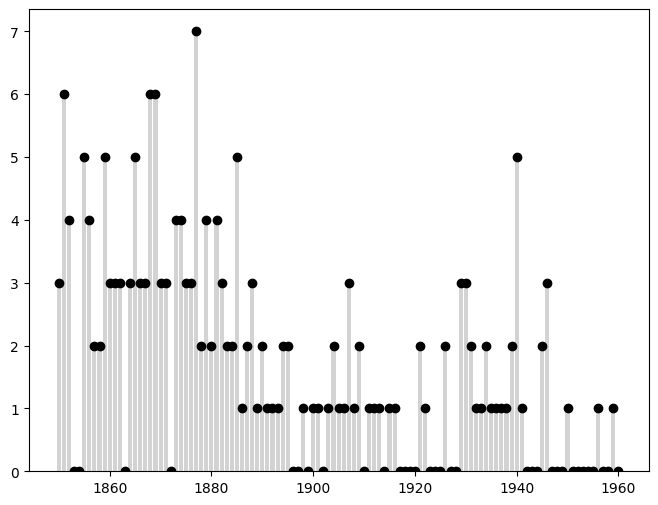

In [12]:
coal = mistat.load_data('COAL')
coal.index = range(1850, 1961)

_, ax = plt.subplots(figsize=(8, 6))
# use zorder to plot the dots over the bars
ax.scatter(coal.index, coal, color='black', zorder=2)
ax.bar(coal.index, coal, color='lightgrey', zorder=1)
plt.show()

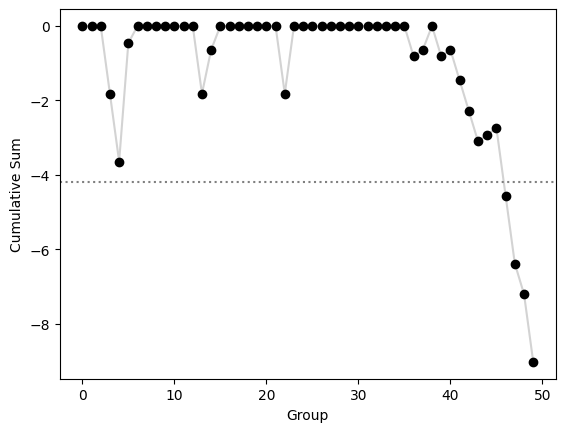

In [13]:
analysis = mistat.Cusum(coal.iloc[:50], center=1.82, std_dev=1, se_shift=0, decision_interval=4.19)
ax = pd.Series(analysis.neg).plot(color='lightgrey', marker='o',
      markerfacecolor='black', markeredgecolor='black')
ax.set_xlabel('Group')
ax.set_ylabel('Cumulative Sum')
ax.axhline(-analysis.decision_interval, color='grey', linestyle=':')
plt.show()

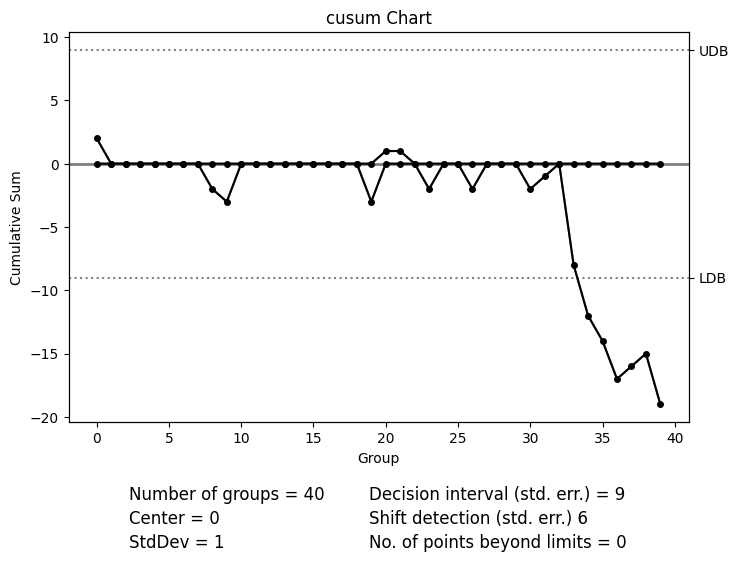

In [14]:
thickdiff = mistat.load_data('THICKDIFF')

analysis = mistat.Cusum(thickdiff, center=0, std_dev=1, se_shift=6,
                        decision_interval=9)
analysis.plot()
plt.show()

### Average Run Length, Probability of False Alarm, and Conditional Expected Delay

In [15]:
results = []
for loc in (0, 0.5, 1.0, 1.5):
    arl = mistat.cusumArl(randFunc=stats.norm(loc=loc), N=100,
                          limit=10_000, seed=100, verbose=False)
    results.append({
        'theta': loc,
        'ARL': arl['statistic']['ARL'],
        '2 S.E.': 2 * arl['statistic']['Std. Error'],
    })
print(pd.DataFrame(results))

   theta     ARL      2 S.E.
0    0.0  978.71  294.600536
1    0.5  126.66   36.962435
2    1.0   16.54    4.265489
3    1.5    5.86    1.386506


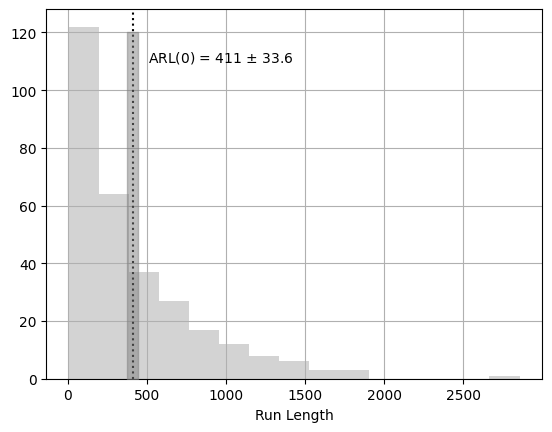

In [16]:
arl = mistat.cusumArl(randFunc=stats.norm(loc=10, scale=5), N=300, limit=7000, seed=1,
                     kp=12, km=8, hp=29, hm=-29, verbose=False)
rls = [r.rl for r in arl['run']]
ax = pd.Series(rls).hist(bins=15, color='lightgrey', zorder=1)
ax.set_xlabel('Run Length')
arlstats = arl['statistic']
ax.axvline(arlstats['ARL'], linestyle=':', zorder=3, color='black')
ax.fill_between([arlstats['ARL'] - arlstats['Std. Error'], arlstats['ARL'] + arlstats['Std. Error']],
        120, color='grey', zorder=10, alpha=0.5)
ax.text(510, 110, f"ARL(0) = {arlstats['ARL']:.0f} $\pm$ {arlstats['Std. Error']:.1f}")
plt.show()

In [17]:
for h in (18.7, 28, 28.5, 28.6, 28.7, 29, 30):
  arl = mistat.cusumArl(randFunc=stats.norm(loc=10, scale=5),
          N=300, limit=7000, seed=1, kp=12, km=8, hp=h, hm=-h,
          verbose=False)
  print(f"h {h:5.1f}: ARL(0) {arl['statistic']['ARL']:5.1f} ",
        f"+/- {arl['statistic']['Std. Error']:4.1f}")

h  18.7: ARL(0)  70.7  +/-  5.5
h  28.0: ARL(0) 363.2  +/- 30.0
h  28.5: ARL(0) 387.7  +/- 31.5
h  28.6: ARL(0) 394.7  +/- 32.4
h  28.7: ARL(0) 397.3  +/- 32.5
h  29.0: ARL(0) 411.4  +/- 33.6
h  30.0: ARL(0) 484.0  +/- 42.0


h  28.6: ARL(0) 394.7  +/- 32.4


h  28.7: ARL(0) 397.3  +/- 32.5


h  29.0: ARL(0) 411.4  +/- 33.6


h  30.0: ARL(0) 484.0  +/- 42.0


In [18]:
results = []
for p in (0.05, 0.06, 0.07):
    arl = mistat.cusumArl(randFunc=stats.binom(n=100, p=p), N=100, limit=2000,
                          seed=1, kp=5.95, km=3.92, hp=12.87, hm=-8.66)
    results.append({
        'p': p,
        'delta': p/0.05,
        'ARL': arl['statistic']['ARL'],
        '2 S.E.': 2 * arl['statistic']['Std. Error'],
    })
print(pd.DataFrame(results))

      p  delta     ARL     2 S.E.
0  0.05    1.0  291.71  78.261710
1  0.06    1.2   41.00  10.528704
2  0.07    1.4   11.78   2.636513


In [19]:
arl = mistat.cusumArl(randFunc=stats.poisson(mu=10), N=100, limit=2000, seed=1,
                     kp=12.33, km=8.41, hp=11.36, hm=-12.91)
arl['statistic']

{'ARL': 289.6363636363636, 'Std. Error': 43.223677106723144}

In [20]:
results = []
for loc in (0.5, 1.0, 1.5):
    pfaced = mistat.cusumPfaCed(randFunc1=stats.norm(),
                                randFunc2=stats.norm(loc=loc),
                                tau=100, N=100, limit=1_000, seed=1,
                                verbose=False)
    results.append({
        'theta': loc,
        'PFA': pfaced['statistic']['PFA'],
        'CED': pfaced['statistic']['CED'],
        'S.E.': pfaced['statistic']['Std. Error'],
    })

In [21]:
print(pd.DataFrame(results))

   theta   PFA         CED       S.E.
0    0.5  0.08  109.206522  21.695590
1    1.0  0.08   15.663043  12.022705
2    1.5  0.08    4.869565  10.927976


## Bayesian Detection

In [22]:
common = {'mean0': 10, 'sd': 3, 'n': 5, 'tau': 10, 'w': 99, 'seed': 1,
          'verbose': False}
pd.DataFrame([
    mistat.shroArlPfaCedNorm(delta=0.5, **common)['statistic'],
    mistat.shroArlPfaCedNorm(delta=1.0, **common)['statistic'],
    mistat.shroArlPfaCedNorm(delta=1.5, **common)['statistic'],
    mistat.shroArlPfaCedNorm(delta=2.0, **common)['statistic'],
], index=[0.5, 1.0, 1.5, 2.0])

,ARL,Std. Error,PFA,CED,CED-Std. Error
0.5,17.17,0.250621,0.00,7.170000,1.580130
1.0,12.45,0.106184,0.01,2.505051,1.234753
1.5,11.55,0.080467,0.01,1.606061,1.156715
2.0,11.04,0.059867,0.01,1.090909,1.109741


In [23]:
common = {'mean0': 10, 'sd': 3, 'n': 5, 'delta': 2.0, 'seed': 1,
          'verbose': False}
pd.DataFrame([
    mistat.shroArlPfaCedNorm(w=19, **common)['statistic'],
    mistat.shroArlPfaCedNorm(w=50, **common)['statistic'],
    mistat.shroArlPfaCedNorm(w=99, **common)['statistic'],
], index=[19, 50, 99])

,ARL,Std. Error
19,48.81,4.411115
50,106.32,10.868872
99,186.49,18.288885


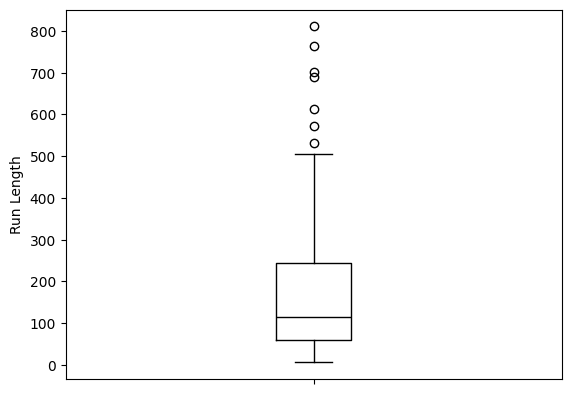

In [24]:
result = mistat.shroArlPfaCedNorm(mean0=10, sd=3, n=5, delta=2.0, w=99, seed=1, verbose=False)

ax = pd.Series(result['rls']).plot.box(color='black')
ax.set_ylabel('Run Length')
plt.show()

## Process Tracking

### The EWMA Procedure

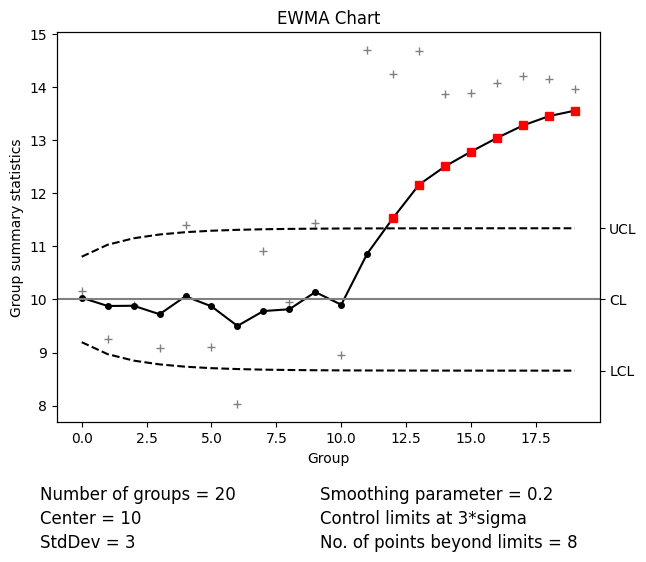

In [25]:
np.random.seed(1)

x = [*stats.norm(loc=10, scale=3).rvs(11*5), *stats.norm(loc=14).rvs(9*5)]

groups = [y for xi in range(1, 21) for y in [xi]*5]
grouped = mistat.qcc_groups(x, groups=groups)

ewma = mistat.EWMA(grouped, center=10, std_dev=3, smooth=0.2, nsigmas=3)
ewma.plot()
plt.show()

### The BECM Procedure

### The Kalman Filter

In [26]:
dojo1935 = mistat.load_data('DOJO1935')

# solve the regression equation
m = 20
sqrt_t = np.sqrt(range(1, m + 1))
df = pd.DataFrame({
    'Ut': dojo1935[:m]/sqrt_t,
    'x1t': 1 / sqrt_t,
    'x2t': sqrt_t,
})
model = smf.ols(formula='Ut ~ x1t + x2t - 1', data=df).fit()
mu0, delta = model.params
var_eta = np.var(model.resid, ddof=2)
pd.Series({'mu0': mu0, 'delta': delta, 'Var(eta)': var_eta})

mu0         127.484294
delta         0.655591
Var(eta)      0.073094
dtype: float64

In [27]:
# choose sig2e and w20
sig2e = 0.0597
w20 = 0.0015

# apply the filter
results = []
mu_tm1 = mu0
w2_tm1 = w20
y_tm1 = mu0
for i in range(0, len(dojo1935)):
    y_t = dojo1935[i]
    B_t = sig2e / (var_eta + w2_tm1)
    mu_t = B_t * (mu_tm1 + delta) + (1 - B_t) * y_t
    results.append({
        't': i + 1, # adjust for Python indexing starting at 0
        'y_t': y_t,
        'mu_t': mu_t,
    })
    w2_tm1 = B_t * (var_eta - sig2e + w2_tm1)
    mu_tm1 = mu_t
    y_tm1 = y_t
results = pd.DataFrame(results)

In [28]:
results

,t,y_t,mu_t
0,1,128.06,128.123935
1,2,129.05,128.860064
2,3,129.76,129.599472
3,4,130.35,130.289430
4,5,130.77,130.880329
...,...,...,...
295,296,169.14,170.004860
296,297,166.36,169.049545
297,298,168.07,169.092630
298,299,168.79,169.389281


In [29]:
def renderResults(results):
  style = results.iloc[:25,].style.hide(axis='index')
  style = style.format(precision=2)
  s = style.to_latex(hrules=True)
  s = s.replace('y_t', '$y_t$').replace('mu_t', '$\\mu_t$')
  print(s)

### The QMP tracking method

In [30]:
soldef = mistat.load_data('SOLDEF')

print('Batches above quality standard: ', sum(soldef > 100))
print('Batches above UCL: ', sum(soldef > 130))

xbar = np.cumsum(soldef) / np.arange(1, len(soldef)+1)
results = []
for i in range(2, len(soldef)):
    xbar_tm1 = np.mean(xbar[i-1])
    S2_tm1 = np.var(soldef[:i])
    gamma_tm1 = S2_tm1/xbar_tm1 - 1
    nu_tm1 = xbar_tm1 / gamma_tm1
    result = {
        't': i + 1,
        'Xt': soldef[i],
        'xbar_tm1': xbar_tm1,
        'S2_tm1': S2_tm1,
        'Gamma_tm1': gamma_tm1,
        'nu_tm1': nu_tm1,
    }
    f = gamma_tm1 / (gamma_tm1 + 1)
    shape = nu_tm1 + soldef[i]
    result['lambda_t'] = f * shape
    result.update(((f'lambda({p})', f * stats.gamma.ppf(p, a=shape, scale=1))
                   for p in (0.01, 0.05, 0.95, 0.99)))
    results.append(result)
results = pd.DataFrame(results)

Batches above quality standard:  78
Batches above UCL:  56


In [31]:
results.iloc[7:18,:6]

,t,Xt,xbar_tm1,S2_tm1,Gamma_tm1,nu_tm1
7,10,29,23.666667,75.555556,2.192488,10.794433
8,11,16,24.200000,70.560000,1.915702,12.632442
9,12,31,23.454545,69.702479,1.971811,11.894925
10,13,19,24.083333,68.243056,1.833622,13.134298
11,14,18,23.692308,64.828402,1.736264,13.645570
12,15,20,23.285714,62.346939,1.677476,13.881400
13,16,103,23.066667,58.862222,1.551830,14.864167
14,17,31,28.062500,429.558594,14.307210,1.961424
15,18,33,28.235294,404.768166,13.335539,2.117297
16,19,12,28.500000,383.472222,12.455166,2.288207


In [32]:
columns = ['t', 'lambda_t', 'lambda(0.01)', 'lambda(0.05)', 'lambda(0.95)', 'lambda(0.99)']
results[columns].iloc[7:18,:]

,t,lambda_t,lambda(0.01),lambda(0.05),lambda(0.95),lambda(0.99)
7,10,27.329412,18.269554,20.614625,34.823998,38.404511
8,11,18.812358,11.608966,13.426364,24.943983,27.941960
9,12,28.460991,19.335560,21.709736,35.965710,39.533742
10,13,20.793935,13.220777,15.149897,27.172485,30.264858
11,14,20.080321,12.718035,14.591126,26.289756,29.303464
12,15,21.227169,13.673109,15.605406,27.560145,30.618912
13,16,71.676080,57.216594,61.173113,82.870183,87.922817
14,17,30.808097,19.711615,22.543950,40.133227,44.645935
15,18,32.667630,21.223593,24.158968,42.232357,46.840514
16,19,13.226295,6.462529,8.042895,19.458119,22.694785


## Automatic Process Control

In [33]:
c_A = 100
c_d = 1000
b = 1
q_tp1 = c_d
data = []
for t in range(14, 0, -1):
    q_t = c_A * q_tp1 / (c_A + q_tp1 * b**2)
    p_t = b * q_tp1 / (c_A + q_tp1 * b**2)
    data.append({'t': t, 'q_t': q_t, 'p_t': p_t})
    q_tp1 = q_t
result = pd.DataFrame(data)

In [34]:
result

,t,q_t,p_t
0,14,90.909091,0.909091
1,13,47.619048,0.476190
2,12,32.258065,0.322581
3,11,24.390244,0.243902
4,10,19.607843,0.196078
5,9,16.393443,0.163934
6,8,14.084507,0.140845
7,7,12.345679,0.123457
8,6,10.989011,0.109890
9,5,9.900990,0.099010


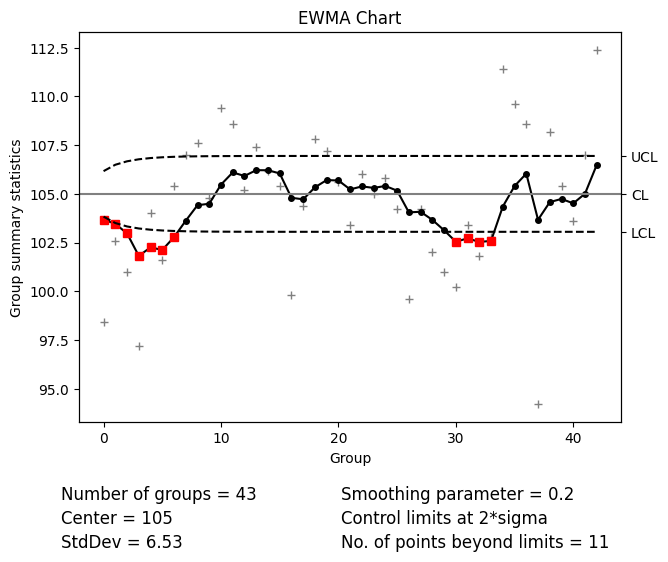

In [35]:
speed = mistat.load_data('FILMSP')

groups = [y for x in range(1, 44) for y in [x]*5]
grouped = mistat.qcc_groups(speed[:215], groups=groups)

ewma = mistat.EWMA(grouped, center=105, std_dev=6.53, nsigmas=2)
ax = ewma.plot()
plt.show()

## Chapter Highlights

## Exercises